[[4800101.]]
1.1454593362163488


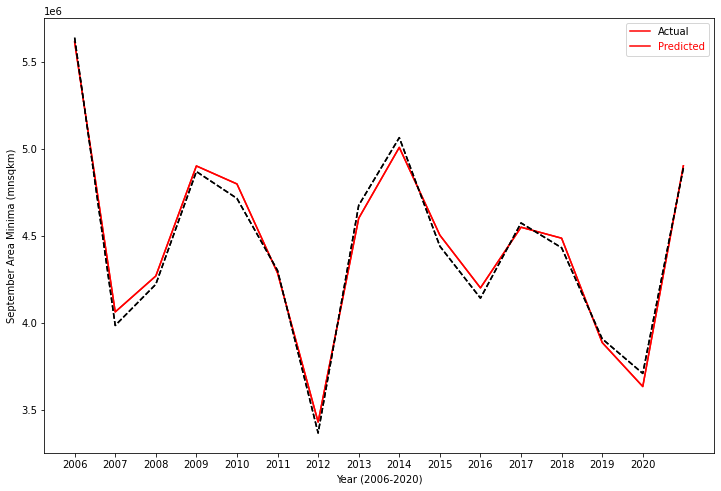

In [24]:
from numpy import array
from numpy import hstack

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import ssl
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler



ssl._create_default_https_context = ssl._create_unverified_context


#fetch masie data
url="http://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02186/masie_4km_allyears_extent_sqkm.csv"
df=pd.read_csv(url,header=1)
df

#create year column based on stringsplit of dates within csv
df["year"] = df['yyyyddd'].astype(str) 
df["year"]= df['year'].str[:4]
df["year"]=df["year"].astype(int)



#initialise X and y for model
X=[]
y=[]

# for year in range 2006-2021
for i in range(2006,2022):
    
    
    #select only Jan-Feb data
    df_sub=df[df['year']==i].head(60)
    
    inputs=[]
    
    #iterate over different seas within the masie data, there are 15 total seas
    for col in range(1,16):
        vals=df_sub.iloc[:,col].values.tolist()
        #append val list with first 60 measurements from each sea
        inputs.append(vals)
        
    #append X list with all seas first 60 measurement for that year    
    X.append(inputs)
    
X=np.array(X)



# for year in range 2006-2021
for i in list(range(2006,2022)):
    
    
    
    
    #get the total Northern Hemisphere september minima for that year
    y_val=np.min(df[df['year']==i].iloc[:,1].values.tolist())
        
    
    #append the y of model with sept minima
    y.append(y_val)
    
y=np.array(y)

    
    
# training features of all 15 seas    
n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
X.shape

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)


#make predictions for each year
predicted=[]

for i in range (0,16):
    x_input = X[i]
    #print(x_input)
    x_input = x_input.reshape((1, X.shape[1], X.shape[2]))
    yhat = model.predict(x_input, verbose=0)
    predicted.append(yhat)

predicted


predicted=np.ravel(predicted)




#calculate difference between predicted and actual as percent
diff=[]

for i in range(0,len(y)):
    diffs=((predicted[i]-y[i])/y[i])*100
    diff.append(np.abs(diffs))

diff




print(np.mean(diff))


#make plot of actual versus predicted
plt.figure(figsize=(12,8))

plt.plot(predicted,c='red')



plt.plot(predicted,c='red')
plt.plot(y,c='black',linestyle='--')
plt.ylabel('September Area Minima (mnsqkm)')
plt.xlabel('Year (2006-2020)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
           ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
plt.legend(['Actual', 'Predicted'],labelcolor=['black','red'])


    
plt.plot(y,c='black',linestyle='--')

In [9]:
X

array([[[1.30347239e+07, 1.30347239e+07, 1.31706632e+07, ...,
         1.41480719e+07, 1.41480719e+07, 1.41480719e+07],
        [1.06971081e+06, 1.06971081e+06, 1.06971081e+06, ...,
         1.06971081e+06, 1.06971081e+06, 1.06971081e+06],
        [9.66006160e+05, 9.66006160e+05, 9.66006160e+05, ...,
         9.61796200e+05, 9.61796200e+05, 9.61796200e+05],
        ...,
        [6.39590070e+05, 6.39590070e+05, 6.66030400e+05, ...,
         5.49140790e+05, 5.49140790e+05, 5.49140790e+05],
        [1.14085300e+04, 1.14085300e+04, 1.14085300e+04, ...,
         1.11391280e+05, 1.11391280e+05, 1.11391280e+05],
        [2.87369540e+05, 2.87369540e+05, 3.11943210e+05, ...,
         8.77853800e+05, 8.77853800e+05, 8.77853800e+05]],

       [[1.29915117e+07, 1.29807507e+07, 1.32023923e+07, ...,
         1.46632518e+07, 1.47054666e+07, 1.48214832e+07],
        [1.06971081e+06, 1.06971081e+06, 1.06971081e+06, ...,
         1.06971081e+06, 1.06971081e+06, 1.06971081e+06],
        [9.66006160e+05, 

In [22]:
X.shape

(16, 15, 60)

In [21]:
y.shape

(16,)